# Author: Alexander Goudemond, Student Number: 219030365

This Jupyter Notebook aims at exploring the data-sets for the project, and finding ways to represent the data in an easy way

# Data-Set File Heirarchy

This section of the notebook focusses on understanding the file heirarchy of the data-sets

Let us start with some imports:

In [1]:
from os import getcwd, walk, sep, mkdir, stat
from os.path import exists, basename

import matplotlib.pyplot as plt
import cv2

In [2]:
print(getcwd())

c:\Users\G5\UKZN\COMP700


The file path used by author should be: "C:\Users\G5\UKZN\COMP700"

In [3]:
desired_directory = "Data-Sets"
current_directory = getcwd()

print( exists(current_directory + "/" + desired_directory) )

True


The output should be true as the file path we are interested in is:

```
COMP700
|_______Data-Sets
```

There are many files inside this folder, so let us get the first 2 'branches' to show the user

In [4]:
path = walk(current_directory + "/" + desired_directory)

count = 0
for root, dirs, files in path:
    print(dirs)
    print("Length is:", len(dirs), "\n")
    if (count == 1):
        break
        
    count += 1

['Extracted', 'OriginalZipped']
Length is: 2 

['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC(1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa(1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7(1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC(1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1(1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+(1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa(1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373(1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC(1)']
Length is: 20 



I.e. :

```
COMP700
|_______Data-Sets
        |_______Extracted
                |_______BF-C2DL-HSC
                |_______BF-C2DL-HSC (1)
                |_______ ...
                
        |_______OriginalZipped
                |_______BF-C2DL-HSC.zip
                |_______BF-C2DL-HSC (1).zip
                |_______ ...
```

The walk() function does not show zipped files, but that is what is contained in the directory called _OriginalZipped_

A detailed breakdown of all directories can be shown with following function, adapted from stack overflow:

In [5]:
# from os import sep

# Author: dhobbs on Mar 15, 2012 at 21:29, https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python
def list_files(startpath):
    for root, dirs, files in walk(startpath):
        level = root.replace(startpath, '').count(sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            # 3 lines of code added to improve readibility
            if (".tif" in f):
                print('{}{}'.format(subindent, "..."))
                break
            print('{}{}'.format(subindent, f))

path = (current_directory + "/" + desired_directory)

list_files(path)

Data-Sets/
    Extracted/
        BF-C2DL-HSC/
            BF-C2DL-HSC/
                01/
                    ...
                01_GT/
                    SEG/
                        ...
                    TRA/
                        man_track.txt
                        ...
                01_ST/
                    SEG/
                        ...
                02/
                    ...
                02_GT/
                    SEG/
                        ...
                    TRA/
                        man_track.txt
                        ...
                02_ST/
                    SEG/
                        ...
        BF-C2DL-HSC (1)/
            BF-C2DL-HSC/
                01/
                    ...
                02/
                    ...
        BF-C2DL-MuSC/
            BF-C2DL-MuSC/
                01/
                    ...
                01_GT/
                    SEG/
                        ...
                    TRA/
                       

The ellipses above indicate that images are contained in that location.

In order to view every folder's collection of images, we need to travel individually into each folder and look at the images contained there.

Before we go any further, it is important to acknowledge the structure of the directories. 

There are 20 data-sets contained here. Every folder that has the suffix _(1)_ represents the CHALLENGE data-set, provided by the Cell Tracking Challenge.

Inside the TRAINING data-sets, additional folders appear, either as shown on the left OR as shown on the right:

```
    01                                            01
    01_GT                                         01_GT
    01_ST                                         02
    02                                            02_GT
    02_GT                                         
    02_ST                                         
```

If the folder contains the suffix "\_GT" of "\_ST", then the image contents have the naming convention "man\_segXXXX.tif" or "man\_trackXXXX.tif", otherwise the  images have the naming convention "tXXXX.tif", where XXXX represents the number of the image in that folder

The author suspects that "man\_seg" represents a manually segmented cell, whereas "man\_track" represents a manually tracked cell. The other files are the "Petri Dish" files, showing the complete landscape of the cells under the microscope

Now, windows photo viewer (and the extension in VS Code) show the "man\_" images as pure black images.... This is not helpful or useful

# Image recognition

In the section below, the notebook will explore ways to extract the valuable information from these seemingly black images

Opencv creates the same phenomenon:

In [6]:
sample_directory = "SampleImages"

path = walk(current_directory + "/" + sample_directory)

i = 1
for root, dirs, files in path:
    print(files)
    
    for item in files:
        location = (current_directory + "/" + sample_directory + "/" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        (x, y) = img.shape
        break

imgSmall = cv2.resize(img, (x // 2, y //2))
cv2.imshow(item, imgSmall)
cv2.waitKey(0)

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']


-1

However, If we use Matplotlib to view a sample of each of the TIF images, we see the following:

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']


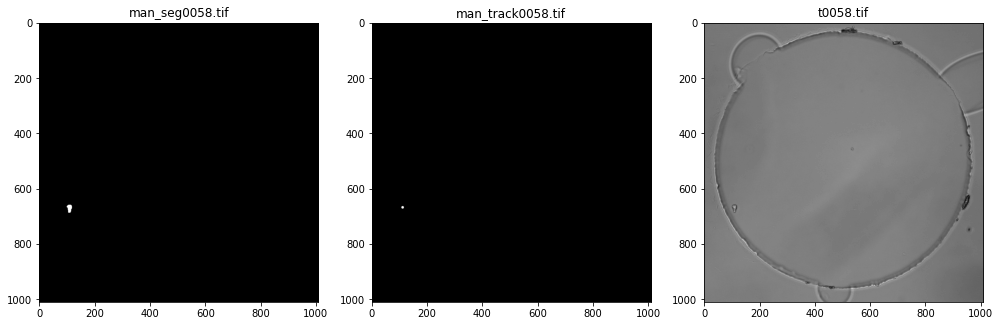

In [7]:
sample_directory = "SampleImages"

path = walk(current_directory + "/" + sample_directory)

i = 1
for root, dirs, files in path:
    print(files)
    fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "/" + sample_directory + "/" + item)
        img = plt.imread(location)
        
        fig.add_subplot(1, 3, i)
        plt.title(item)
        plt.imshow(img, cmap="gray")
        i += 1

plt.tight_layout()
plt.show()


As we can see from the pop-up window - the details in the Opencv window are not being shown... They ARE being shown in the Matplotlib.Pyplot package.

This is not desirable, as Opencv has some useful tools we'd like to use for data visualization. So we need to find a way to get the features shown from Matplotlib, and preserve them for future use with Opencv

Let us see if we can mix and match:

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']


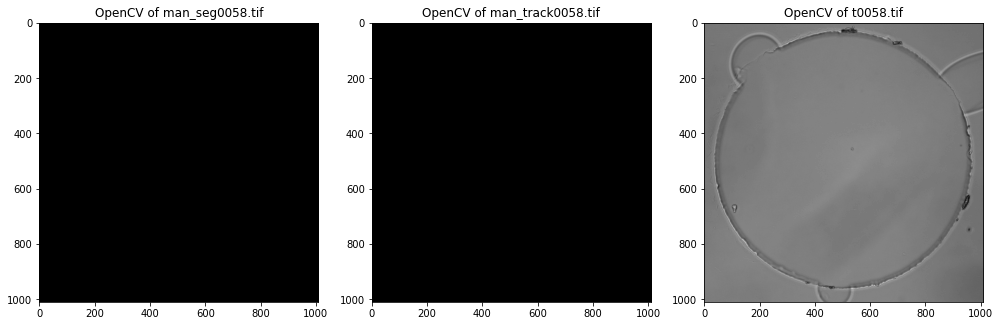

In [8]:
path = walk(current_directory + "/" + sample_directory)

i = 1
for root, dirs, files in path:
    print(files)
    fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "/" + sample_directory + "/" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        
        fig.add_subplot(1, 3, i)
        plt.title("OpenCV of " + item)
        plt.imshow(img, cmap="gray")
        i += 1

plt.tight_layout()
plt.show()

NO! We cannot mix and match. What about saving a file using Matplotlib and then opening it using Opencv?

In [9]:
path = walk(current_directory + "/" + sample_directory)
destination_directory = "MatplotlibSavedImages"
try:
    mkdir(destination_directory)
except FileExistsError:
    pass
except:
    print("Unknown Error Encountered...")

# i = 1
for root, dirs, files in path:
    print(files)
    # fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "/" + sample_directory + "/" + item)
        img = plt.imread(location)
        name = destination_directory + "/" + "Matplotlib_" + item[ : -4] + ".jpg"
        plt.imsave(name, img, cmap="gray")
        
path = walk(current_directory + "/" + destination_directory)

for root, dirs, files in path:
    print(files)
    for item in files:
        location = (current_directory + "/" + destination_directory + "/" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        (x, y) = img.shape
        break

imgSmall = cv2.resize(img, (x // 2, y //2))
cv2.imshow(item, imgSmall)
cv2.waitKey(0)

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']
['Matplotlib_man_seg0058.jpg', 'Matplotlib_man_track0058.jpg', 'Matplotlib_t0058.jpg']


-1

YES! We can do that. So that is one option for how we can address the inconsitent black images. However, this option changes the quality from TIFF to JPG...

Another option is to attempt to read the images in using matplotlib.pyplot and then write them using Opencv

Let us try to do that now:

In [10]:
path = walk(current_directory + "/" + sample_directory)

destination_directory = "OpencvSavedImages"
try:
    mkdir(destination_directory)
except FileExistsError:
    pass
except:
    print("Unknown Error Encountered...")

# i = 1
for root, dirs, files in path:
    print(files)
    # fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "/" + sample_directory + "/" + item)
        img = plt.imread(location)
        name = destination_directory + "/" + "Opencv_" + item
        cv2.imwrite(name, img)

path = walk(current_directory + "/" + destination_directory)

for root, dirs, files in path:
    print(files)
    for item in files:
        location = (current_directory + "/" + destination_directory + "/" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        (x, y) = img.shape
        break

imgSmall = cv2.resize(img, (x // 2, y //2))
cv2.imshow(item, imgSmall)
cv2.waitKey(0)


['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']
['Opencv_man_seg0058.tif', 'Opencv_man_track0058.tif', 'Opencv_t0058.tif']


-1

Unfortunately, that does not work... So our best bet is to read them in and save them using Matplotlib. This is not ideal, as we may lose a bit of quality converting from TIF to JPG

We desire to read in the image using Matplotlib, and write it to disk as a grayscale TIF. Though this does not appear possible, as Matplotlib does not support TIFF extensions. Let's try create Grayscale TIFF's from the sample pictures?

In [11]:
path = walk(current_directory + "/" + sample_directory)
destination_directory = "GrayscaleTiffs"
try:
    mkdir(destination_directory)
except FileExistsError:
    pass
except:
    print("Unknown Error Encountered...")

# i = 1
for root, dirs, files in path:
    print(files)
    # fig = plt.figure(figsize=(14, 8))
    
    for item in files:
        location = (current_directory + "/" + sample_directory + "/" + item)
        img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)
        name = destination_directory + "/" + "Grayscale_" + item
        cv2.imwrite(name, img)
    

['man_seg0058.tif', 'man_track0058.tif', 't0058.tif']


We can use a function to calculate the size of a file like this:

In [12]:
# from os import stat

bytes = stat("GrayscaleTiffs/Grayscale_man_seg0058.tif").st_size
print("File is", bytes / 1024, "kb's")

File is 19.185546875 kb's


If we compare the Sample Images file size to that of our other files, we recognize the following:

In [13]:
places_array = ["SampleImages", "GrayscaleTiffs", "MatplotlibSavedImages", "OpencvSavedImages"]

for i in range(len(places_array)):
    location = current_directory + "/" + places_array[i]
    path = walk(location)

    for root, dirs, files in path:  
        print(places_array[i], end="\t")

        # add tab space for readability
        if (i < 2):
            print("\t", end="")

        for item in files:
            bytes = stat(location + "/" + item).st_size
            bytes = bytes / 1024
            print( str(bytes)[ : 6], "kb's", end="\t") # keep first 5 sig figs (ignore fullstop)
        print()




SampleImages		38.419 kb's	38.281 kb's	509.12 kb's	
GrayscaleTiffs		19.185 kb's	19.185 kb's	414.22 kb's	
MatplotlibSavedImages	16.892 kb's	16.738 kb's	42.908 kb's	
OpencvSavedImages	38.277 kb's	38.201 kb's	414.22 kb's	


From the results above, we can see that the Grayscale TIFFs we created result in a loss of information for the manually segmented and tracked images, but only a small loss for the main image.

The file sizes for MatplotlibSavedImages follows a similar pattern, however the original Petri Dish image has a large loss in quality...

OpencvSavedImages should be virtually identical to the original pictures, as Opencv merely read them in and saved them, as is.

From the above, we can infer that a loss in quality in the manually segmented and tracked images is acceptable, however we would like to try preserve the data in the Petri dish image.

Before we conclude this, let us look at the Pillow package to identify if we can see the details in the manually segmented and tracked images

In [14]:
# Imports PIL module 
from PIL import Image

im = Image.open("SampleImages/man_seg0058.tif") 
im.show()

Unfortunately not... We have no choice but to convert each image into a grayscale image, in order to see the details for the manually segmented and tracked images. One option we have is to leave the Petri Dish images as Tiff, and convert the rest to JPG... that solution may be ideal as we preserve the most amount of information for our segmentation software.

# Data-Set Cell Variation

This section of the notebook focusses on sampling one Perti Dish image from each folder and placing them together, to see the different cells present

['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC(1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa(1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7(1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC(1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1(1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+(1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa(1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373(1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC(1)']

Starting matplotlib



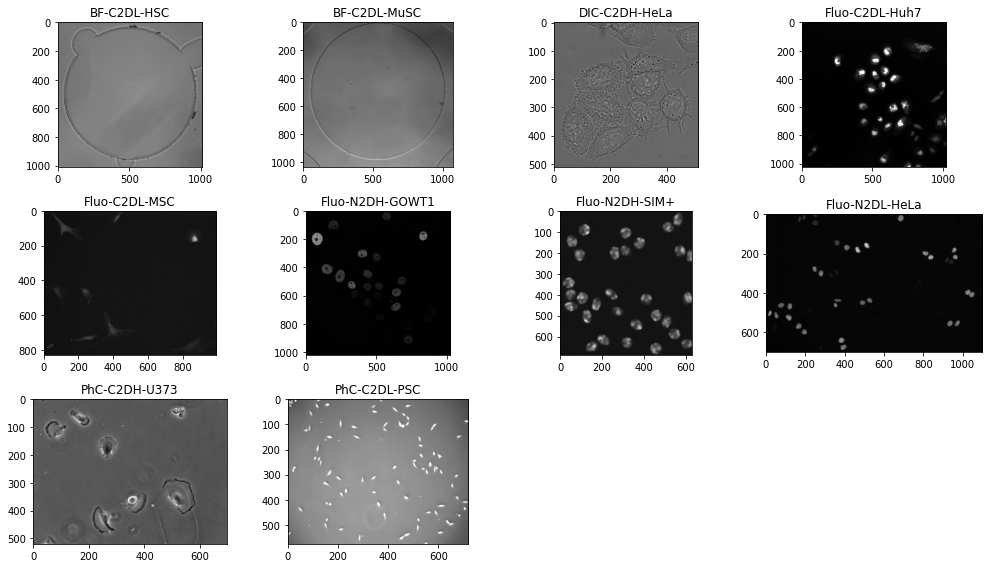

In [34]:
'''
We only need to show every _OTHER_ folder, as each data-set has a 
 training and challenge set. So out of 20 files, we need to show 10

First things first, let us create an array of the directory locations
'''

data_sets = "Data-Sets"

path = walk(current_directory + "\\" + data_sets)

directory_array = [] # contains the main folders

i = 1
for root, dirs, files in path:
    if (i == 2):
        directory_array = dirs
        break
    
    i += 1

print(directory_array)

print("\nStarting matplotlib\n")

path = walk(current_directory + "\\" + data_sets) # reset path

fig = plt.figure(figsize=(14, 8))

i = -1
temp = -1
counter = 1 # used for matplotlib subplots
for root, dirs, files in path:
    # print(dirs)
    for item in files:
        # only execute for first picture in directory
        if ("t0000.tif" == item) or ("t000.tif" == item):
            i += 1

            # skips folder "02" in data-sets
            if (i % 2 == 1):
                break
                
            # print(i)
            temp = i // 2

            # skip Challenge data-sets
            if ("(1)" in directory_array[temp]):
                break

            location = ( current_directory + "\\" + data_sets + "\\Extracted\\" + directory_array[temp] + 
                        "\\" + directory_array[temp] + "\\01\\" + item)
            # print(location)

            img = plt.imread(location)
            
            fig.add_subplot(3, 4, counter)
            plt.title(directory_array[temp])
            plt.imshow(img, cmap="gray")

            counter += 1

            break

        else:
            break


plt.tight_layout()

# save file for future use
plt.savefig("Visualization_Of_Cells.jpg")

plt.show()

# save file for future use
# plt.savefig("Visualization_Of_Cells.jpg")


Great! That is a nice visualization of each data-set. If we look at the website, we can confirm the dimensions of each microscope used:

| Data-Set Name   | Pixel Size (Microns) | Time Step (Min) |
|-----------------|----------------------|-----------------|
| BF-C2DL-HSC     | 0.645 X 0.645        | 5               |
| BF-C2DL-MuSC    | 0.645 X 0.645        | 5               |
| DIC-C2DH-HeLa   | 0.19 x 0.19          | 10              |
| Fluo-C2DL-MSC   | 0.3 x 0.3            | 20              |
| Fluo-N2DH-GOWT1 | 0.240 x 0.240        | 5               |
| Fluo-N2DL-HeLa  | 0.645 x 0.645        | 30              |
| PhC-C2DH-U373   | 0.65 x 0.65          | 15              |
| PhC-C2DL-PSC    | 1.6 x 1.6            | 10              |
| Fluo-N2DH-SIM+  | 0.125 x 0.125        | 29              |